In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.linear_model import LinearRegression
import util
import scipy
from scipy.stats import pearsonr
import math
import seaborn as sns

In [2]:
repo_name = {}

def read_data(filepath):
    d = pd.read_csv(filepath)
    return d

def clean_data():
    curr_millis = int(round(time.time()))

    d = read_data("../data/MLR/watcher.csv")
    repo = d["repo_name"]
    watch_count = d["watch_count"]
    for i in range(len(repo)):
            repo_name[repo[i]] = [watch_count[i], np.nan, np.nan, np.nan, np.nan, np.nan]

    d = read_data("../data/MLR/lang_count.csv")
    repo = d["L_repo_name"]
    lang_count = d["L_lang_count"]
    lan_sum = 0
    count = 0
    for i in range(len(repo)):
            if repo[i] in repo_name:
                    repo_name[repo[i]][1] = lang_count[i]
            if not pd.isnull(lang_count[i]):
                lan_sum += lang_count[i]
                count += 1
    
    mean_lang_count = lan_sum/count
    print(mean_lang_count)
    
    file_sum = 0
    count = 0
    d = read_data("../data/MLR/files_count.csv")
    repo = d["S_repo_name"]
    file_count = d["C_files"]
    for i in range(len(repo)):
            if not pd.isnull(file_count[i]):
                    repo_name[repo[i]][2] = file_count[i]
            if not pd.isnull(file_count[i]):
                file_sum += file_count[i]
                count += 1
    
    mean_file_count = file_sum/count
    print(mean_file_count)

    commiter_sum = 0
    count = 0
    d = read_data("../data/MLR/committer_count.csv")
    repo = d["S_repo_name"]
    committer_count = d["C_committer_count"]
    for i in range(len(repo)):
            if not pd.isnull(committer_count[i]):
                    repo_name[repo[i]][3] = committer_count[i]
            if not pd.isnull(committer_count[i]):
                commiter_sum += committer_count[i]
                count += 1
    
    mean_committer_count = commiter_sum/count
    print(mean_committer_count)

    commit_sum = 0
    count = 0
    d = read_data("../data/MLR/commit_count.csv")
    repo = d["S_repo_name"]
    commit_count = d["C_comm_count"]
    for i in range(len(repo)):
            if not pd.isnull(commit_count[i]):
                    repo_name[repo[i]][4] = commit_count[i]
            if not pd.isnull(commit_count[i]):
                commit_sum += commit_count[i]
                count += 1
    
    mean_commit_count = commit_sum/count
    print(mean_commit_count)

    d = read_data("../data/MLR/committer_date.csv")
    repo = d["S_repo_name"]
    commit_date = d["C_commit_date"]
    for i in range(len(repo)):
            if not pd.isnull(commit_date[i]):
                    dt_obj = datetime.strptime(commit_date[i][:-4],'%Y-%m-%d %H:%M:%S')
                    millisec = dt_obj.timestamp()
                    repo_name[repo[i]][5] = math.log(curr_millis - millisec)
                    
    repo_name1 = repo_name.copy()
    print(len(repo_name1))
    for i in repo_name.keys():
            if pd.isnull(repo_name[i][5]):
                    del repo_name1[i]

    print(len(repo_name1))
    return (repo_name1, mean_lang_count, mean_file_count, mean_committer_count, mean_commit_count)

In [3]:
(repo_name1, mean_lang_count, mean_file_count, mean_committer_count, mean_commit_count) = clean_data()

2.5628183462
325.597920902
11.4284996691
849.54371336
400000
169216


In [4]:
df = pd.DataFrame.from_dict(repo_name1, orient='index')
df.columns = ["watch_count", "lang_count", "files_count", "committer_count", "commit_count", "commit_date"]
df.to_csv("../data/MLR/Final.csv")

In [5]:
data = pd.read_csv("../data/MLR/Final.csv")

In [6]:
LC = data['lang_count']
FC = data['files_count']
CC = data['committer_count']
COC = data['commit_count']
CD = data['commit_date']
WC = data['watch_count']
O = np.ones((len(FC),1))

#creating the x matix with the two features and excluding beta_0
X = np.zeros((len(FC),6))
X[:,0] = list(O)[:]
X[:,1] = LC[:]
X[:,2] = FC[:]
X[:,3] = CC[:]
X[:,4] = COC[:]
X[:,5] = CD[:]

null_val_index = np.argwhere(np.isnan(X))
for i in range(0,len(null_val_index)):
    if null_val_index[i][1] == 1:
        X[null_val_index[i][0]] = mean_lang_count
    elif null_val_index[i][1] == 2:
        X[null_val_index[i][0]] = mean_file_count
    elif null_val_index[i][1] == 3:  
        X[null_val_index[i][0]] = mean_committer_count
    elif null_val_index[i][1] == 4:
        X[null_val_index[i][0]] = mean_commit_count


Y = np.zeros((len(WC),1))
Y[:,0] = WC[:]

In [7]:
lm = LinearRegression()
model = lm.fit(X,Y)
beta = model.coef_.tolist()
Y_pred = model.predict(X)
r2 = model.score(X, Y)
print("beta = " + str(beta))
print("r2 = " + str(r2))

beta = [[11.394028149552009, 1.508906449445207, -0.0019558359559039046, 1.1576879569268865, -0.0016641712273327857, -14.894304432450587]]
r2 = 0.0267840586971


In [27]:
j = (Y-Y_pred).tolist()

In [32]:
j.remove(max(j))
j.remove(max(j))
j.remove(max(j))

In [35]:
j

[[9475.192701085942],
 [8780.256436926966],
 [8349.179167587085],
 [8463.963905230525],
 [7243.338766155259],
 [8028.96794638637],
 [7702.896594055571],
 [7671.747428863488],
 [7341.173551659129],
 [7256.242466953617],
 [7147.605703122492],
 [6488.7304983374715],
 [5930.298974894804],
 [6287.9799299686265],
 [5730.432144943186],
 [5605.899685539026],
 [5974.726624376709],
 [5792.742646911947],
 [5975.003959736739],
 [5355.8665104869615],
 [5725.57494176411],
 [5354.202204769038],
 [5367.189473372991],
 [5390.830564400651],
 [5308.724205987233],
 [5296.345464983872],
 [5284.753109271116],
 [5167.31965188139],
 [5024.546096374927],
 [4840.608039931778],
 [4671.642346949678],
 [5011.486258228818],
 [5069.566138386689],
 [2858.7822454769052],
 [4950.35687098202],
 [4899.153169199997],
 [4257.06051201331],
 [4963.940026015377],
 [4776.740840619394],
 [4757.485578440861],
 [4757.990627545975],
 [4356.57559555743],
 [4656.326413543282],
 [4657.77029646448],
 [4522.057959761146],
 [4540.512026

In [33]:
SSE = 0
for i in range(0,len(j)):
    epis_val = j[i][0]
    SSE += epis_val**2

In [34]:
SSE

4993374859.411887

In [8]:
print("SSE = " + str(util.getSSE(Y,Y_pred)))
print("MAPE = " + str(util.getMAPE(Y,Y_pred)))

SSE = 13393089977.3
MAPE = 540.514437499


In [9]:
def plotfig(X, Y, x_label, y_label):
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, s=5,alpha=1)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
#     plt.ylim(-1000,4000)
#     plt.xlim(-500,1000)
    plt.show()

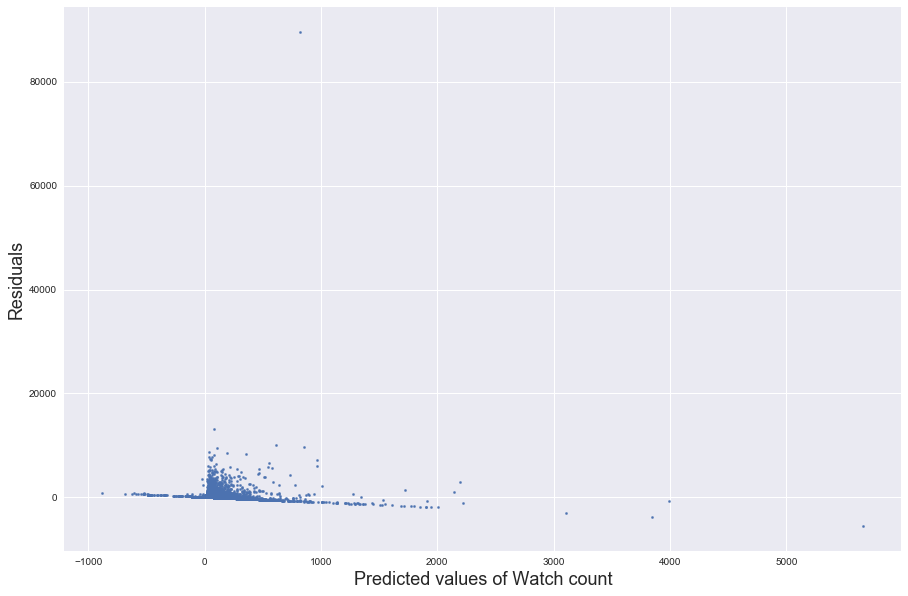

In [21]:
epsilon = Y-Y_pred
plotfig(np.array(Y_pred), np.array(epsilon),'Predicted values of Watch count','Residuals')

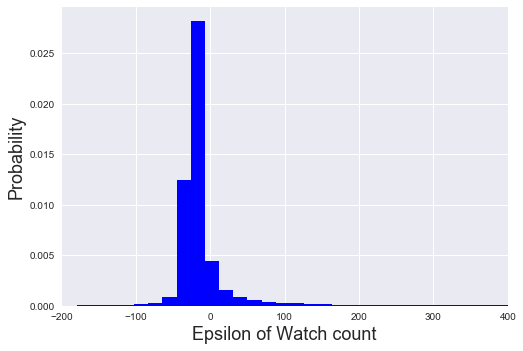

In [20]:
plt.hist(epsilon, bins=5000, facecolor = "Blue", normed=True)
plt.xlim(-200,400)
plt.xlabel('Epsilon of Watch count',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.show()

# PART B

In [13]:
XB = X[:,[0,3]]

In [38]:
def pt(X, Y, Y_pred):
    X = np.array(X)
    Y = np.array(Y)
    Y_pred = np.array(Y_pred)

    plt.scatter(X, Y, s=10, c="blue", alpha=1, label="Actual Commit count")
    plt.plot(X, Y_pred, color='orange', linestyle='solid', label="Regression Fit")
    plt.xlabel('Commit count')
    plt.ylabel('Watch count')
    plt.legend()
    plt.show()

In [14]:
lm = LinearRegression()
model1 = lm.fit(XB,Y)
betaB = model1.coef_.tolist()
r2B = model1.score(XB, Y)
Y_predB = model1.predict(XB)
print("beta = " + str(betaB))
print("r2 = " + str(r2B))

beta = [[-0.8676173085952703, 0.8241727240053086]]
r2 = 0.0196927322993


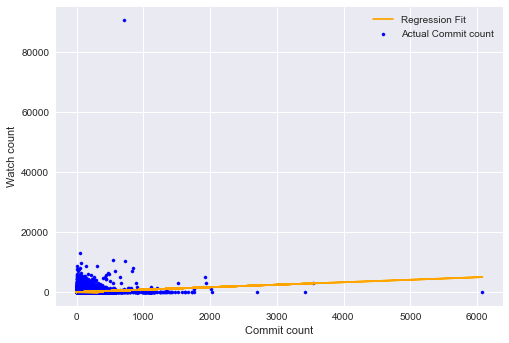

In [39]:
pt(X[:,3], Y, Y_predB)

In [15]:
print("SSE = " + str(util.getSSE(Y,Y_predB)))
print("MAPE = " + str(util.getMAPE(Y,Y_predB)))

SSE = 13490678568.4
MAPE = 550.432175793


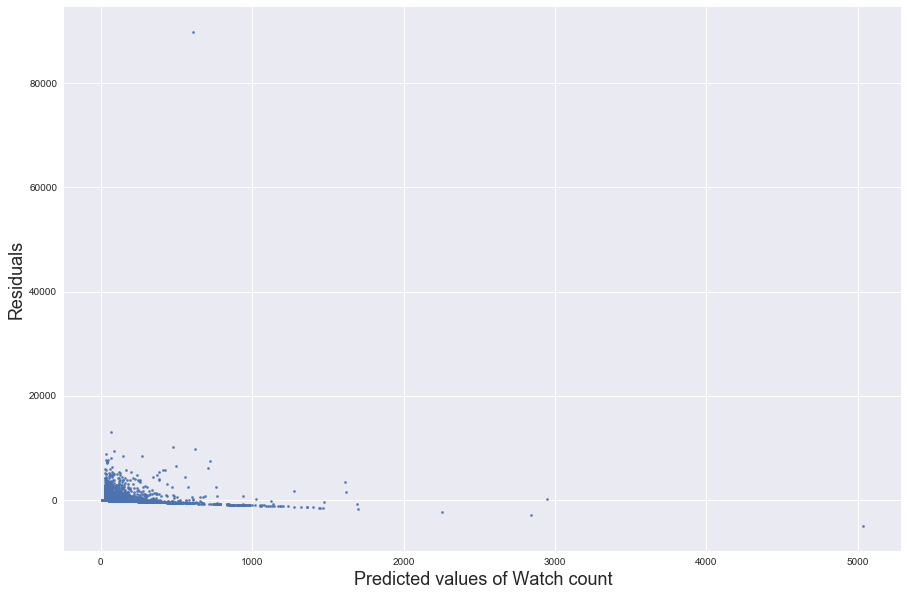

In [18]:
epsilonB = Y-Y_predB
plotfig(np.array(Y_predB), np.array(epsilonB),'Predicted values of Watch count','Residuals')

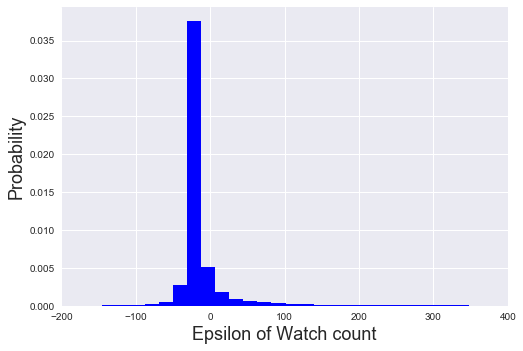

In [19]:
plt.hist(epsilonB, bins=5000, facecolor = "Blue", normed=True)
plt.xlim(-200,400)
plt.xlabel('Epsilon of Watch count',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.show()

In [122]:
X3 = X.copy()
X3[:,0] = Y[:,0]
ncols = 6
cvalue = 0
corrs = []
for i in range(0, ncols):
    data1 = X3[:,i:i+1]
    cvalue = cvalue + 1
    for j in range(0, ncols):
        data2 = X3[:,j:j+1]
        corr, n_corr = scipy.stats.pearsonr(data1,data2)
        corrs.append(corr)

In [123]:
inv_colnames = ['Age of Repository = AR','Committers Count = COC','Commit Count = CC','Files Count = FC','Language Count = LC', 'Watchers Count = WC']
colnames = ['WC', 'LC', 'FC', 'CC', 'COC', 'AR']

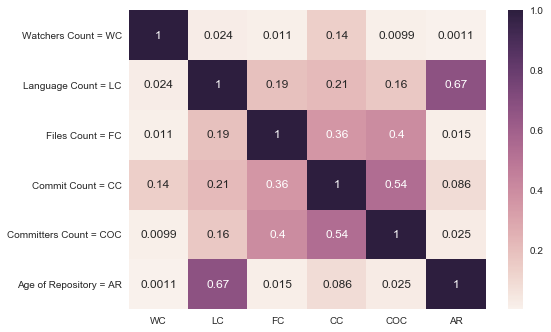

In [124]:
#creating heatmap using seaborn library
a = np.array(corrs).reshape(cvalue,cvalue)
ax = sns.heatmap(a,annot=True)
ax.set_yticklabels(inv_colnames, rotation=0)
ax.set_xticklabels(colnames)
plt.show()